In [563]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
import joblib
%matplotlib inline

In [564]:
df = pd.read_csv('cleaned_paddy_data.csv')
df.head()

,paddy_yield(in_kg)_scaled,max_temp_d1_d30_scaled,min_temp_d31_d60_scaled,max_temp_d31_d60_scaled,max_temp_d61_d90_scaled,min_temp_d91_d120_scaled,max_temp_d91_d120_scaled,inst_wind_speed_d1_d30(in_knots)_scaled,inst_wind_speed_d31_d60(in_knots)_scaled,inst_wind_speed_d61_d90(in_knots)_scaled,...,agriblock_Sankarapuram,variety_delux ponni,wind_direction_d1_d30_SSE,wind_direction_d1_d30_W,wind_direction_d31_d60_W,wind_direction_d31_d60_WNW,wind_direction_d61_d90_SE,wind_direction_d61_d90_SW,wind_direction_d91_d120_NW,wind_direction_d91_d120_S
0,0.709545,0.5,-0.75,0.00,-1.00,0.0,0.000000,-0.666667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.735764,0.5,0.50,1.25,-0.25,0.0,-1.666667,0.333333,-1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.796395,1.0,0.25,0.00,0.25,2.0,0.000000,-0.666667,0.333333,-2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.708726,0.0,-0.25,0.50,-0.75,-0.5,-0.333333,0.000000,-0.666667,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.642360,-0.5,0.00,-0.50,0.50,0.5,1.333333,0.333333,0.333333,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   paddy_yield(in_kg)_scaled                  2789 non-null   float64
 1   max_temp_d1_d30_scaled                     2789 non-null   float64
 2   min_temp_d31_d60_scaled                    2789 non-null   float64
 3   max_temp_d31_d60_scaled                    2789 non-null   float64
 4   max_temp_d61_d90_scaled                    2789 non-null   float64
 5   min_temp_d91_d120_scaled                   2789 non-null   float64
 6   max_temp_d91_d120_scaled                   2789 non-null   float64
 7   inst_wind_speed_d1_d30(in_knots)_scaled    2789 non-null   float64
 8   inst_wind_speed_d31_d60(in_knots)_scaled   2789 non-null   float64
 9   inst_wind_speed_d61_d90(in_knots)_scaled   2789 non-null   float64
 10  inst_wind_speed_d91_d120

# Train test split = 60 20 20

In [566]:
X_full_train, X_test, y_full_train, y_test = train_test_split(df.drop(columns=['paddy_yield(in_kg)_scaled']), df['paddy_yield(in_kg)_scaled'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [567]:
X_train.shape, X_val.shape, X_test.shape

((1673, 28), (558, 28), (558, 28))

In [568]:
y_train.shape, y_val.shape, y_test.shape

((1673,), (558,), (558,))

In [569]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [570]:
y_train

0      -1.307115
1      -0.509832
2      -0.088215
3       0.000546
4       0.490168
          ...   
1668   -0.479107
1669    0.489827
1670    0.841868
1671   -1.291342
1672    0.471050
Name: paddy_yield(in_kg)_scaled, Length: 1673, dtype: float64

# Modelling

In [571]:
y_dumb_pred = np.array([np.mean(y_train)]*len(y_train))
y_dumb_pred

array([-0.15461353, -0.15461353, -0.15461353, ..., -0.15461353,
       -0.15461353, -0.15461353], shape=(1673,))

In [572]:
dumb_rmse = root_mean_squared_error(y_train, y_dumb_pred)
print(f'Dumb model RMSE: {dumb_rmse}')

Dumb model RMSE: 0.6339352657903311


In [573]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [574]:
y_train_pred = rfr.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print(f'Training RMSE: {train_rmse}')

Training RMSE: 0.6297359945350027


In [575]:
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'Validation RMSE: {rmse}')

Validation RMSE: 0.6245368484875162


In [576]:
# Testing baseline model on test set
y_test_pred = rfr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.6214893315777054


In [577]:
param_dist = {
    'n_estimators': [50,100, 200, 300],  # More trees
    'max_depth': [5, 8, 20, 30, 40, None], # Deeper trees
    'min_samples_leaf': [1, 2, 4,10]      # Allowing for more complex leaves
}

In [578]:
rfr = RandomForestRegressor(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=100,  # Try 100 different combinations
    cv=5,        # Use 5-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1    # Use all available computer cores
)

In [579]:
#rf_random_search.fit(X_train, y_train)

In [580]:
'''
score = rf_random_search.best_score_
train_rmse = np.sqrt(-score)
print(f'Best training RMSE from RandomizedSearchCV(randomforestmodel): {train_rmse}')
best_params = rf_random_search.best_params_
print(f'Best hyperparameters: {best_params}')
'''

"\nscore = rf_random_search.best_score_\ntrain_rmse = np.sqrt(-score)\nprint(f'Best training RMSE from RandomizedSearchCV(randomforestmodel): {train_rmse}')\nbest_params = rf_random_search.best_params_\nprint(f'Best hyperparameters: {best_params}')\n"

In [581]:
rfr = RandomForestRegressor(n_estimators=300,min_samples_leaf=1,max_depth=20,random_state=42)
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print(f'Training RMSE after hyperparameter tuning: {train_rmse}')

Training RMSE after hyperparameter tuning: 0.6297052078432391


In [582]:
y_val_pred = rfr.predict(X_val)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'Validation RMSE after hyperparameter tuning: {val_rmse}')

Validation RMSE after hyperparameter tuning: 0.6243561351753613


In [583]:
y_test_pred = rfr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'Test RMSE after hyperparameter tuning: {test_rmse}')

Test RMSE after hyperparameter tuning: 0.6217496787104992


In [584]:
xgb = XGBRegressor(n_estimators=50, max_depth=10, learning_rate=1, objective='reg:squarederror')
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [585]:
y_train_pred = xgb.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)


In [586]:
y_val_pred = xgb.predict(X_val)
val_rmse = root_mean_squared_error(y_val, y_val_pred)


In [587]:
y_test_pred = xgb.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)


In [588]:
print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE after hyperparameter tuning: {val_rmse}')
print(f'Test RMSE after hyperparameter tuning: {test_rmse}')

Training RMSE: 0.6296938915114821
Validation RMSE after hyperparameter tuning: 0.6242800671789934
Test RMSE after hyperparameter tuning: 0.6214418938987074


# Feature Engineering

In [589]:
df.columns.tolist()

['paddy_yield(in_kg)_scaled',
 'max_temp_d1_d30_scaled',
 'min_temp_d31_d60_scaled',
 'max_temp_d31_d60_scaled',
 'max_temp_d61_d90_scaled',
 'min_temp_d91_d120_scaled',
 'max_temp_d91_d120_scaled',
 'inst_wind_speed_d1_d30(in_knots)_scaled',
 'inst_wind_speed_d31_d60(in_knots)_scaled',
 'inst_wind_speed_d61_d90(in_knots)_scaled',
 'inst_wind_speed_d91_d120(in_knots)_scaled',
 'relative_humidity_d1_d30_scaled',
 'relative_humidity_d31_d60_scaled',
 'relative_humidity_d61_d90_scaled',
 'relative_humidity_d91_d120_scaled',
 'rain_pca',
 'ai_pca',
 'min_temp_d1_d30_and_61_d90',
 'agriblock_Kallakurichi',
 'agriblock_Sankarapuram',
 'variety_delux ponni',
 'wind_direction_d1_d30_SSE',
 'wind_direction_d1_d30_W',
 'wind_direction_d31_d60_W',
 'wind_direction_d31_d60_WNW',
 'wind_direction_d61_d90_SE',
 'wind_direction_d61_d90_SW',
 'wind_direction_d91_d120_NW',
 'wind_direction_d91_d120_S']

In [590]:
df['avg_min_temp_d1_d120'] = (df['min_temp_d31_d60_scaled'] + df['min_temp_d91_d120_scaled'] + df['min_temp_d1_d30_and_61_d90']) / 3

In [591]:
df.drop(columns=['min_temp_d31_d60_scaled', 'min_temp_d91_d120_scaled', 'min_temp_d1_d30_and_61_d90'], inplace=True)

In [592]:
df.columns.tolist()

['paddy_yield(in_kg)_scaled',
 'max_temp_d1_d30_scaled',
 'max_temp_d31_d60_scaled',
 'max_temp_d61_d90_scaled',
 'max_temp_d91_d120_scaled',
 'inst_wind_speed_d1_d30(in_knots)_scaled',
 'inst_wind_speed_d31_d60(in_knots)_scaled',
 'inst_wind_speed_d61_d90(in_knots)_scaled',
 'inst_wind_speed_d91_d120(in_knots)_scaled',
 'relative_humidity_d1_d30_scaled',
 'relative_humidity_d31_d60_scaled',
 'relative_humidity_d61_d90_scaled',
 'relative_humidity_d91_d120_scaled',
 'rain_pca',
 'ai_pca',
 'agriblock_Kallakurichi',
 'agriblock_Sankarapuram',
 'variety_delux ponni',
 'wind_direction_d1_d30_SSE',
 'wind_direction_d1_d30_W',
 'wind_direction_d31_d60_W',
 'wind_direction_d31_d60_WNW',
 'wind_direction_d61_d90_SE',
 'wind_direction_d61_d90_SW',
 'wind_direction_d91_d120_NW',
 'wind_direction_d91_d120_S',
 'avg_min_temp_d1_d120']

In [593]:
#prepare new train, val, test sets with updated dataframe
def prepare_datasets(df):
    X_full_train, X_test, y_full_train, y_test = train_test_split(df.drop(columns=['paddy_yield(in_kg)_scaled']), df['paddy_yield(in_kg)_scaled'], test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    X_train.reset_index(drop=True, inplace=True)
    X_val.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [594]:
X_full_train, X_test, y_full_train, y_test = train_test_split(df.drop(columns=['paddy_yield(in_kg)_scaled']), df['paddy_yield(in_kg)_scaled'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [595]:
X_train.shape, X_val.shape, X_test.shape

((1673, 26), (558, 26), (558, 26))

In [596]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [597]:
y_pred_train = rfr.predict(X_train)
y_pred_val = rfr.predict(X_val)
y_pred_test = rfr.predict(X_test)

In [598]:
train_rmse = root_mean_squared_error(y_train, y_pred_train)
val_rmse = root_mean_squared_error(y_val, y_pred_val)
test_rmse = root_mean_squared_error(y_test, y_pred_test)
print('Random Forest Regressor with New avg of temperatures:')
print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')
print(f'Test RMSE: {test_rmse}')

Random Forest Regressor with New avg of temperatures:
Training RMSE: 0.6297359945350027
Validation RMSE: 0.6245368484875162
Test RMSE: 0.6214893315777054


In [599]:
df['wind_humidity_d1_d30'] = (df['inst_wind_speed_d1_d30(in_knots)_scaled'] * df['relative_humidity_d1_d30_scaled'] )

In [600]:
df.drop(columns=['inst_wind_speed_d1_d30(in_knots)_scaled', 'relative_humidity_d1_d30_scaled'], inplace=True)

In [601]:
X_train,X_val,X_test,y_train,y_val,y_test = prepare_datasets(df)

In [602]:
X_train.shape, X_val.shape, X_test.shape

((1673, 25), (558, 25), (558, 25))

In [603]:
def train_and_evaluate_random_forest(X_train, y_train, X_val, y_val, X_test, y_test):
    rfr = RandomForestRegressor(n_estimators=100, random_state=42)
    rfr.fit(X_train, y_train)

    y_pred_train = rfr.predict(X_train)
    y_pred_val = rfr.predict(X_val)
    y_pred_test = rfr.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    val_rmse = root_mean_squared_error(y_val, y_pred_val)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    print('Random Forest Regressor with Wind-Humidity Interaction Feature:')
    print(f'Training RMSE: {train_rmse}')
    print(f'Validation RMSE: {val_rmse}')
    print(f'Test RMSE: {test_rmse}')
    return rfr

In [604]:
rfr = train_and_evaluate_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

Random Forest Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6297359945350027
Validation RMSE: 0.6245368484875162
Test RMSE: 0.6214893315777054


In [605]:
def train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test):
    xgb = XGBRegressor(n_estimators=50, max_depth=5, learning_rate=1, objective='reg:squarederror')
    xgb.fit(X_train, y_train)

    y_pred_train = xgb.predict(X_train)
    y_pred_val = xgb.predict(X_val)
    y_pred_test = xgb.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    val_rmse = root_mean_squared_error(y_val, y_pred_val)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    print('XGBoost Regressor with Wind-Humidity Interaction Feature:')
    print(f'Training RMSE: {train_rmse}')
    print(f'Validation RMSE: {val_rmse}')
    print(f'Test RMSE: {test_rmse}')
    return xgb

In [606]:
xgb = train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test)

XGBoost Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6296938915114821
Validation RMSE: 0.6242800671789934
Test RMSE: 0.6214418938987074


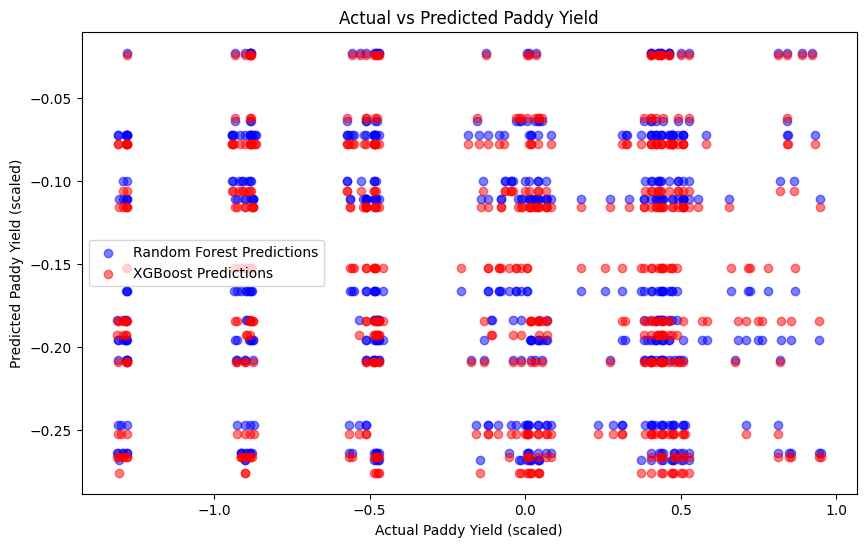

In [607]:
y_pred_rfr = rfr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rfr, color='blue', alpha=0.5, label='Random Forest Predictions')
plt.scatter(y_test, y_pred_xgb, color='red', alpha=0.5, label='XGBoost Predictions')
plt.xlabel('Actual Paddy Yield (scaled)')
plt.ylabel('Predicted Paddy Yield (scaled)')
plt.title('Actual vs Predicted Paddy Yield')
plt.legend()

In [608]:
importance = xgb.feature_importances_
features = X_train.columns
feature_importance = list(zip(features, importance))

In [609]:
feature_importance.sort(key=lambda x: x[1], reverse=True)
feature_importance

[('max_temp_d61_d90_scaled', np.float32(0.59783536)),
 ('relative_humidity_d61_d90_scaled', np.float32(0.18997161)),
 ('max_temp_d31_d60_scaled', np.float32(0.13377336)),
 ('variety_delux ponni', np.float32(0.06405909)),
 ('max_temp_d1_d30_scaled', np.float32(0.014360595)),
 ('max_temp_d91_d120_scaled', np.float32(0.0)),
 ('inst_wind_speed_d31_d60(in_knots)_scaled', np.float32(0.0)),
 ('inst_wind_speed_d61_d90(in_knots)_scaled', np.float32(0.0)),
 ('inst_wind_speed_d91_d120(in_knots)_scaled', np.float32(0.0)),
 ('relative_humidity_d31_d60_scaled', np.float32(0.0)),
 ('relative_humidity_d91_d120_scaled', np.float32(0.0)),
 ('rain_pca', np.float32(0.0)),
 ('ai_pca', np.float32(0.0)),
 ('agriblock_Kallakurichi', np.float32(0.0)),
 ('agriblock_Sankarapuram', np.float32(0.0)),
 ('wind_direction_d1_d30_SSE', np.float32(0.0)),
 ('wind_direction_d1_d30_W', np.float32(0.0)),
 ('wind_direction_d31_d60_W', np.float32(0.0)),
 ('wind_direction_d31_d60_WNW', np.float32(0.0)),
 ('wind_direction_d61_d

In [610]:
columns_low_importance = [feature for feature, importance in feature_importance if importance < 0.01]
columns_low_importance

['max_temp_d91_d120_scaled',
 'inst_wind_speed_d31_d60(in_knots)_scaled',
 'inst_wind_speed_d61_d90(in_knots)_scaled',
 'inst_wind_speed_d91_d120(in_knots)_scaled',
 'relative_humidity_d31_d60_scaled',
 'relative_humidity_d91_d120_scaled',
 'rain_pca',
 'ai_pca',
 'agriblock_Kallakurichi',
 'agriblock_Sankarapuram',
 'wind_direction_d1_d30_SSE',
 'wind_direction_d1_d30_W',
 'wind_direction_d31_d60_W',
 'wind_direction_d31_d60_WNW',
 'wind_direction_d61_d90_SE',
 'wind_direction_d61_d90_SW',
 'wind_direction_d91_d120_NW',
 'wind_direction_d91_d120_S',
 'avg_min_temp_d1_d120',
 'wind_humidity_d1_d30']

In [611]:
X_train.drop(columns=columns_low_importance, inplace=True)
X_test.drop(columns=columns_low_importance, inplace=True)
X_val.drop(columns=columns_low_importance, inplace=True)

In [612]:
final_features = X_train.columns.to_list()

In [613]:
xgb = train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test)

XGBoost Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6296938915114821
Validation RMSE: 0.6242800671789934
Test RMSE: 0.6214418938987074


In [614]:
original_df = pd.read_csv('paddydataset.csv')
original_df.columns = original_df.columns.str.strip().str.lower().str.replace(' ', '_')
rscaler = RobustScaler()
rscaler.fit(original_df[['paddy_yield(in_kg)']])
original_df[['paddy_yield(in_kg)']]


,paddy_yield(in_kg)
0,35028
1,35412
2,36300
3,35016
4,34044
...,...
2784,5836
2785,5723
2786,5723
2787,5916


In [618]:
predicted = xgb.predict(X_test.iloc[4,:].values.reshape(1, -1))
rscaler.inverse_transform(y_test.iloc[4].reshape(1, -1)), rscaler.inverse_transform(predicted.reshape(1, -1))

(array([[17649.]]), array([[21819.086]], dtype=float32))